# 8-Laboratory-26-11-2020

> Credits to the authors of the exercises: Andrea Pasini, Giuseppe Attanasio, Flavio Giobergia <br />
Master of Science in Data Science and Engineering, Politecnico di Torino, A.A. 2020-21

## Synthetic generated data
In the first part of this laboratory you will practise what you learned about regression techniques with some trivial datasets synthetically generated by you. In particular you will generate 4 different datasets: the first 3 can be generated starting from some analytical functions while the fourth one will be generated exploiting the make_regression function available in the scikit-learn library (please refer to the officialdocumentation to learn how this function works)

<center>
     $f_1(x) = x \sin(x) + 2x$ <br />
     $f_2(x) = 10 \sin(x) + x^2$ <br />
     $f_3(x) = 10 sign(x)(x^2 + 300) + 20 \sin(x)$ <br />
</center>

- (1): Use the following snippet of code to create you initial dataset. Note thatf(x)should match one ofthe functions mentioned before.

In [217]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1, 2, 3

def get_function(X,n):
    if n == 1:
        y = X*np.sin(X) + 2*X
    elif n == 2:
        y = 10*np.sin(X) + X**2
    else:
        y = np.sign(X)*(X**2 + 300) + 20*np.sin(X)
    
    return y

Text(0.5, 1.0, 'f3(x)')

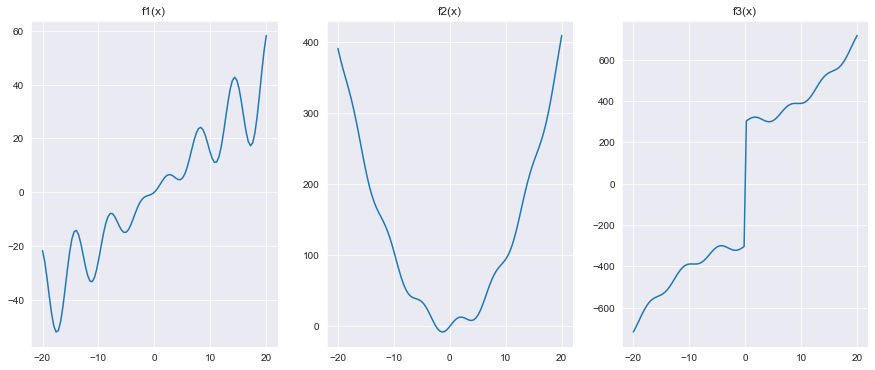

In [218]:
fig, ax = plt.subplots(1,3,figsize=(15,6))

tr = 20
n_samples = 100
X = np.linspace(-tr,tr,n_samples)

f1 = get_function(X,1)
f2 = get_function(X,2)
f3 = get_function(X,3)

ax[0].plot(X,f1)
ax[0].set_title("f1(x)")
ax[1].plot(X,f2)
ax[1].set_title("f2(x)")
ax[2].plot(X,f3)
ax[2].set_title("f3(x)")

In [219]:
from sklearn.model_selection import train_test_split

def get_train_test(X,y):
    X_train, X_test, y_train, y_test = train_test_split(
                    X,y,train_size = 0.7, random_state=42,shuffle=True
                )

    y_test = y_test[X_test.argsort()]
    X_test.sort()
    return X_train, X_test, y_train, y_test

- (2) : Draw and inspect the shape of the function. Which regression model of those you know could achievebetter performance.

f1(x) and f2(x) are an asymptotic behaviour, so it can be easily approximated with a polynomial regressor. Then, f3(x) has a discontinuity point, so have to see how will answer its approximation

- (3-4) : Frame now a regression task to your generated data. Start from the ordinary least squares LinearRegression. Then, choose additional models which you believe could outperform linear regression to approximate the function. Fit each model to the training data and predict the function value for each test point. Evaluate your regression outcome in terms of a metric of your choice. Refer tosklearn.metrics module to find some. Does any model stand out in terms of regression quality in every case or theshape of the function favors (or penalizes) any of them

I'll build general and autonomous methods, in order to better generalize the procedure with different regressors. 

In [76]:
from sklearn.metrics import r2_score

def eval_model(X,y,model,label,func):
    
    # train_test
    X_train, X_test, y_train, y_test = get_train_test(X,y)
    
    # prediction
    model.fit(X_train[:,np.newaxis],y_train)
    y_pred = model.predict(X_test[:,np.newaxis])
    
    # plot
    fig, ax = plt.subplots()
    ax.scatter(X, y, s=1, c='grey')
    ax.plot(X_test, y_pred,label=label)
    ax.set_title(func)
    fig.legend()
    
    return r2_score(y_test,y_pred)

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

# I'll put inside that container all the models that I want to test
models_container = [
    LinearRegression(),
    Ridge(),
    RandomForestRegressor(n_estimators=300)
]

labels = ["LinearRegression","Ridge","Random Forest"]


***************	 ~ f1(x)
[('LinearRegression', 0.891991685511165), ('Ridge', 0.8920090766219946), ('Random Forest', 0.987700541500093)]

***************	 ~ f2(x)
[('LinearRegression', -0.018699772461413966), ('Ridge', -0.018697590091869998), ('Random Forest', 0.9965820300423077)]

***************	 ~ f3(x)
[('LinearRegression', 0.9322327960738965), ('Ridge', 0.932229755839259), ('Random Forest', 0.9996803625629959)]


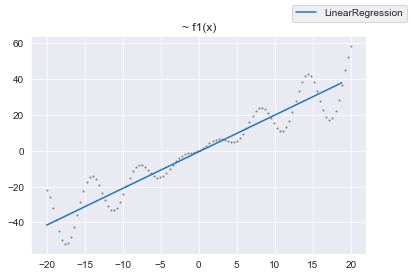

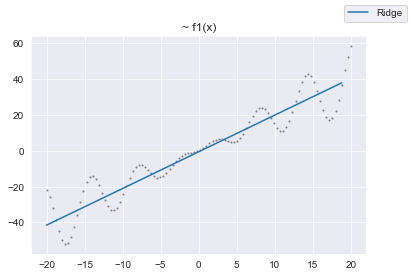

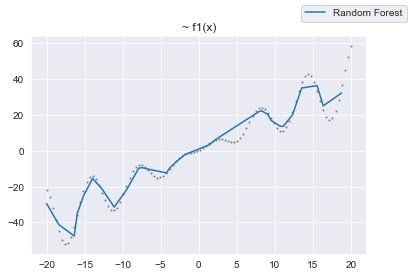

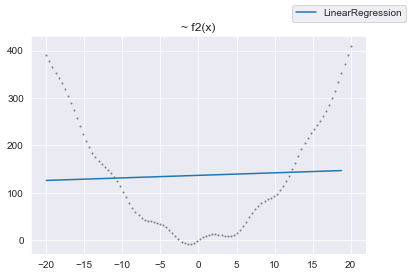

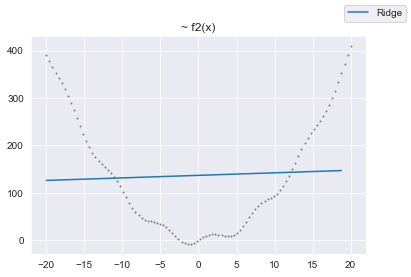

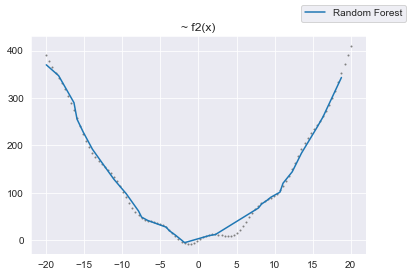

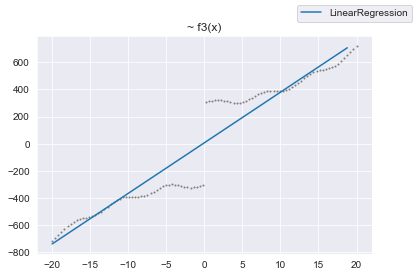

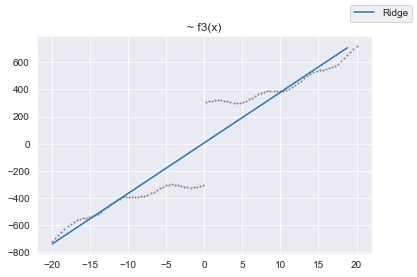

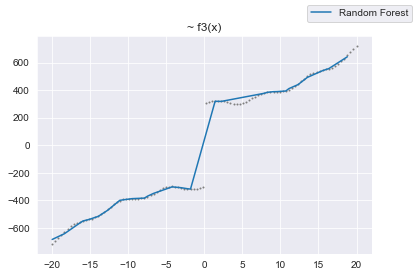

In [222]:

funcs = [f1,f2,f3]
titles = ["~ f1(x)","~ f2(x)","~ f3(x)"]

for f,t in zip(funcs,titles):
    r2_list = []
    for model, label in zip(models_container,labels):
        r2_list.append((label,eval_model(X,f,model,label,t)))
    print("\n***************\t",t)
    print(r2_list)

- (5) Back in Point 2, you could visually inspect the function shape1. Although this is not always thecase, you can exploit this sort of knowledge to enhance your initial representation. With this inmind, choose a set of new features (e.g. polynomials, trigonometric functions) and introduce themin training data. Then, test again your best performing model and discuss whether your scores haveimproved or worsened.

The linear model don't approximate the initial function at all. The most accurate one seems to be the RandomForest. 

- (6*) As many real-world tasks request, your model must be robust to noise. To test the model you developed in previous points, you can shift your initial data injecting some random noise. 

In [224]:
def inject_noise(y):
    """Add a random noise drawn from a normal distribution."""
    return y + np.random.normal(0, 50, size=y.size)


***************	 ~ f1(x)
[('LinearRegression', 0.24741223620716268), ('Ridge', 0.24738860314601763), ('Random Forest', 0.14712926649943303)]

***************	 ~ f2(x)
[('LinearRegression', 0.24741223620716268), ('Ridge', 0.24738860314601763), ('Random Forest', 0.14712926649943303), ('LinearRegression', -0.020354316472213974), ('Ridge', -0.020353442842115488), ('Random Forest', 0.7258966659385924)]

***************	 ~ f3(x)
[('LinearRegression', 0.24741223620716268), ('Ridge', 0.24738860314601763), ('Random Forest', 0.14712926649943303), ('LinearRegression', -0.020354316472213974), ('Ridge', -0.020353442842115488), ('Random Forest', 0.7258966659385924), ('LinearRegression', 0.9082568188945729), ('Ridge', 0.9082519154131382), ('Random Forest', 0.985363572022836)]


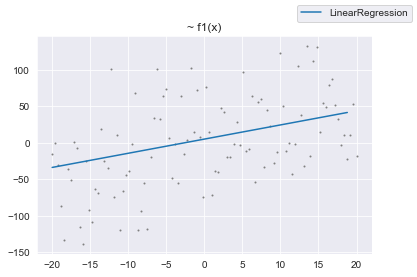

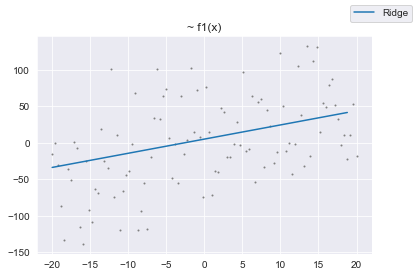

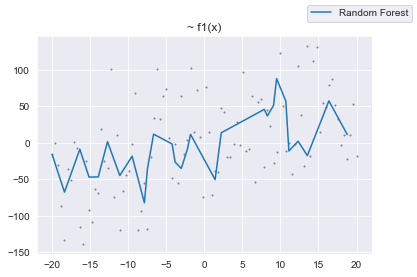

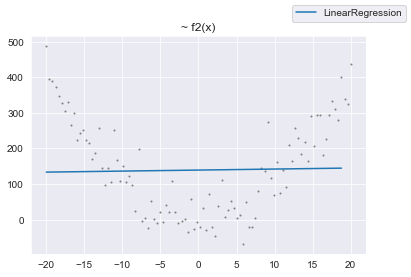

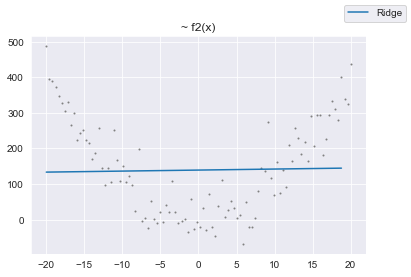

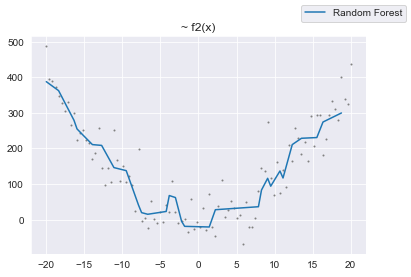

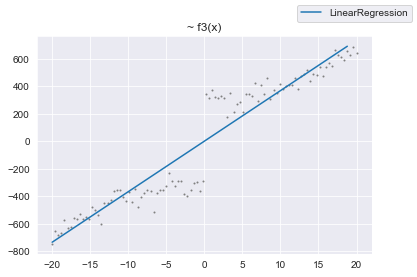

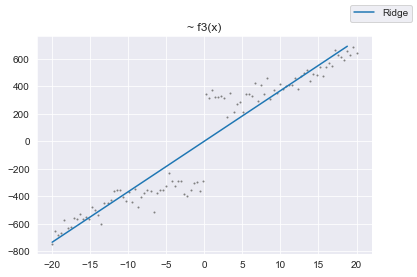

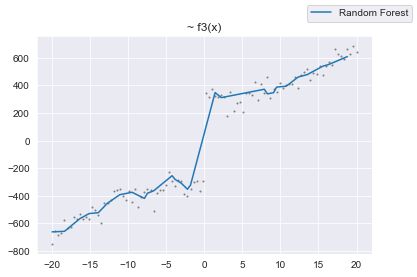

In [225]:
f1_noisey = inject_noise(f1)
f2_noisey = inject_noise(f2)
f3_noisey = inject_noise(f3)

r2_list = []
funcs = [f1_noisey,f2_noisey,f3_noisey]
titles = ["~ f1(x)","~ f2(x)","~ f3(x)"]

for f,t in zip(funcs,titles):
    for model, label in zip(models_container,labels):
        r2_list.append((label,eval_model(X,f,model,label,t)))
    print("\n***************\t",t)
    print(r2_list)

As it can be clearly seen, the most robust is the random forest, whose obtain nice results also in presence of dirty data.

## Multivariate regression on synthetic data
In this exercise, you will carry out a multivariate regression analysis. In the context of this exercise, you will work on a synthetic, multi-feature dataset generated to matcha multivariate regression problem as described for the car selling service.

- (1) : Generate a random synthetic dataset for a regression problem using the scikit-learn’s make_regressionfunction. Take your time to understand the construct parameters and their default values. Start withat least 2000 samples and a fixed random state

In [227]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=2000, random_state=42)

In [228]:
X.shape, y.shape

((2000, 100), (2000,))

- (2) : Test the regression pipeline that you developed previously. Pay enough attention to the differences with the previous exercise:

In [229]:
X_train, X_test, y_train, y_test = train_test_split(
                    X,y,train_size = 0.7, random_state=42,shuffle=True
                )
for model, label in zip(models_container,labels):    
    model.fit(X_train,y_train)
    print(f"{label}\t\t{r2_score(y_test,model.predict(X_test))}")

LinearRegression		1.0
Ridge		0.9999993361938854
Random Forest		0.7324878842339919


- (3) Using the function constructor, make the problem harder for your regression model. Try to regeneratethe dataset adding some noise using the noiseparameter and to increase or reduce the gap between n_features and n_informative features.

In [236]:
X1, y1 = make_regression(n_samples=2000, random_state=42, n_informative=50)
y1 = inject_noise(y1)

X_train, X_test, y_train, y_test = train_test_split(
                    X1,y1,train_size = 0.7, random_state=42,shuffle=True
                )
for model, label in zip(models_container,labels):    
    model.fit(X_train,y_train)
    print(f"{label}\t\t{r2_score(y_test,model.predict(X_test))}")

LinearRegression		0.9887856831200333
Ridge		0.9887975321905824
Random Forest		0.3478310213872172


In [237]:
X2, y2 = make_regression(n_samples=2000, random_state=42, n_informative=5)
y2 = inject_noise(y2)

X_train, X_test, y_train, y_test = train_test_split(
                    X2,y2,train_size = 0.7, random_state=42,shuffle=True
                )
for model, label in zip(models_container,labels):    
    model.fit(X_train,y_train)
    print(f"{label}\t\t{r2_score(y_test,model.predict(X_test))}")

LinearRegression		0.9125107754873658
Ridge		0.9125301851542037
Random Forest		0.7999835214974546


With few n_informative we notice that the random forest improves its own performance whereas the linear ones have quite worse performances. On the other hand, if we deal with more n_informative, the linear models will perform much better than the RandomForest. 

## Second World War Temperture
The dataset for the second part of the laboratory is a real dataset made available by the National Oceanicand Atmospheric Administration and hosted on Kaggle. The dataset contains daily information on weather conditions collected during the World War II, start-ing from 1940-01-01 until 1945-12-31. The data has been collected by 159 weather stations located all around the world for a total of 119040 recordings. Measurements like Min Temperature, Mean Temperature and Max Temperature have been recorded by the sensors other then the Precipitationsin mm and others. The dataset page at this link contains all the details for each columns of the dataset.

Summaryof Weather.csv: it contains the daily measurements collected by the sensors. The fields thatare useful for this laboratory are:
- STA: id of the weather station
- Date: the date of the recording
- MaxTemp: daily maximum temperature recorded in degree Celsius
- MinTemp: daily minimum temperature recorded in degree Celsius
- MeanTemp: daily mean temperature in degree Celsius

WeatherStationLocations.csv: it contains some metadata related to the sensors like theLatitudeandtheLongitudefor each sensor. This file is not relevant for the purposes of this laboratory. For further details refer to the information available on kaggle. 

Notice that not all the weather stations collected data for the whole period, thus, the temporal seriesare characterised by a lot of missing values in many cases. For simplicity you will work only with thedata collected by the sensor identified by the id: 22508. This sensor is located at {Lat:21.48333333,Lon:-158.05}, corresponding to the Honolulu Hawaii island. 

- (1) : Load theSecond World War Weatherdataset. In particular you have to load the data contained inSummaryof Weather.csv


In [1]:
import pandas as pd

df = pd.read_csv('../Datasets/weatherww2/SummaryofWeather.csv')
df.sample(5)

C:\Users\Francesco\anaconda3\envs\FrancescoEnv\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
38584,13005,1943-7-10,0,NaN,37.222222,18.333333,27.777778,0,NaN,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32317,11902,1944-7-24,1.016,NaN,33.888889,23.888889,28.888889,0,1,44,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
67632,32503,1944-12-23,T,NaN,21.111111,16.111111,18.888889,0,1,44,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
37309,13002,1942-12-25,0,NaN,18.333333,7.777778,13.333333,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100152,50304,1944-2-19,0,NaN,31.111111,22.222222,26.666667,0,NaN,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- (2) : Inspect the content of the dataset identifying if there are missing values for the sensors in the dataset, checking for the top 10 most complete sensors (in terms of collected data) the distribution of therecorded mean temperatures (MeanTempcolumn).

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

There are several null values over these 119040 rows, but luckly our intersted columns have 119040 non null values. Let's discover the top 10 "useful" sensors from the second given file. 

In [3]:
df.groupby("STA").size().sort_values(0, ascending=False)[:10]

STA
22508    2192
10701    2185
22502    2154
22504    2118
10803    1750
11610    1631
16405    1622
11601    1604
10502    1527
11604    1514
dtype: int64

Now we need to preprocess the data in two ways. Firstly we should consider just the sensor 22508 and then we should convert the date from object to Dyte, because we're dealing with the time series. Finally, because we're intersted on the evoltuion of the temperature over the days, we could use the Date as an index

In [4]:
df = df[df["STA"] == 22508]
df["Date"]= pd.to_datetime(df["Date"]) 
df = df.set_index("Date")
df.sample(5)

,STA,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
Date,,,,,,,,,,,,,,,,,,,,,
1945-05-12,22508,0,NaN,28.888889,17.777778,23.333333,0,NaN,45,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1942-07-28,22508,T,NaN,27.777778,22.222222,25.000000,0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1940-07-07,22508,3.048,NaN,27.222222,21.111111,24.444444,0,NaN,40,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1942-04-14,22508,0,NaN,23.333333,17.777778,20.555556,0,NaN,42,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1941-09-09,22508,0,NaN,28.333333,20.555556,24.444444,0,NaN,41,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- (3) For simplicity, we will exploit the data collected by a specific sensor. Filter the data by STA(Station)and extract the mean temperature measurements corresponding to sensor with id 22508. 

In [5]:
avgtemps = df[df["STA"] == 22508]["MeanTemp"]
avgtemps.head(5)

Date
1940-01-01    20.000000
1940-01-02    19.444444
1940-01-03    20.000000
1940-01-04    21.111111
1940-01-05    18.333333
Name: MeanTemp, dtype: float64

- (4) : Now you should have an array containing all the measurements collected by sensor 22508 representing the time series of the mean temperatures. Plot the temperatures time series exploiting matplotliband show on the x axis the corresponding datetimes

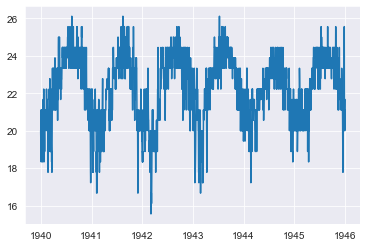

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.plot(avgtemps)

- (5) : To predict the next day temperature, a rolling window pre-processing should be performed to convert the time series into a structured dataset. The rolling windows on the time series can be applied by extracting, from the original time series, a window of length W that moves over the series, with step 1

In [54]:
W = 5
X = [[]]
y = []

for i in range(len(avgtemps)-W):
    for j in range(W):
        X[i].append(avgtemps[i+j])
    y.append(avgtemps[i+j+1])
    X.append([])
    
# delete the last insertion
X.pop()

[]

In [55]:
X[:3]

[[20.0, 19.44444444, 20.0, 21.11111111, 18.33333333],
 [19.44444444, 20.0, 21.11111111, 18.33333333, 20.0],
 [20.0, 21.11111111, 18.33333333, 20.0, 20.55555556]]

In [58]:
y[:3]

[20.0, 20.55555556, 18.88888889]

- (6) : Split the dataset into train and test sets and keep in mind that you are evaluating the forecasting of a time series. To train your model you can consider to use the data from 1940 to 1944 and test thetrained models on 1945 data. A different way of performing the cross validation on time series is the TimeSeriesSplit strategy available in Scikit-learn.

In order to proceed as requestes we should create a Pandas Dataframe. By doing so, we can easily split our train and test set. The problem will regard y, because we'll filter with the Pandas' index, so the ideal case is to define y as a Pandas' series 

In [65]:
import pandas as pd
df_final = pd.DataFrame(X, index=df.index[:avgtemps.size-W])
df_final.head()

,0,1,2,3,4
Date,,,,,
1940-01-01,20.000000,19.444444,20.000000,21.111111,18.333333
1940-01-02,19.444444,20.000000,21.111111,18.333333,20.000000
1940-01-03,20.000000,21.111111,18.333333,20.000000,20.555556
1940-01-04,21.111111,18.333333,20.000000,20.555556,18.888889
1940-01-05,18.333333,20.000000,20.555556,18.888889,19.444444


In [66]:
# as before
y_final = pd.Series(y, index=df.index[:avgtemps.size-W])
y_final.head()

Date
1940-01-01    20.000000
1940-01-02    20.555556
1940-01-03    18.888889
1940-01-04    19.444444
1940-01-05    18.888889
dtype: float64

In [70]:
X_train = df_final[ df_final.index.year < 1945]
X_test = df_final[ df_final.index.year >= 1945]

y_train = y_final[ df_final.index.year < 1945]
y_test = y_final[ df_final.index.year >= 1945]

In [72]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1827, 5), (360, 5), (1827,), (360,))

- (7) : Now, using the regression techniques that you have learned, try to identify which is the most accurateregression model evaluating the r2_score and the mean_squared_error.

In [83]:
from sklearn.metrics import r2_score, mean_squared_error

# we'll use the previous models but we can't use the 
# existed methods because here we already 
r2_list = []
mse_list= []

for model, label in zip(models_container,labels):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2_list.append((label,r2_score(y_test,y_pred)))
    mse_list.append((label,mean_squared_error(y_test,y_pred)))
    
print("\n****** R2 ******\t")
print(r2_list)
print("\n****** MSE ******\t")
print(mse_list)


****** R2 ******	
[('LinearRegression', 0.6781499527462691), ('Ridge', 0.6781781263488091), ('Random Forest', 0.6012914853592686)]

****** MSE ******	
[('LinearRegression', 0.7483681963021741), ('Ridge', 0.7483026868256458), ('Random Forest', 0.9270800936585674)]


- (8) : To visualize the forecasted time series with respect to the real test time series, plot the test valuesand the forecasted values on the same chart. Are you able to predict a horizon longer than 1 day with this kind of techniques? Why?

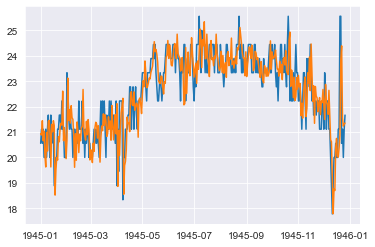

In [90]:
plt.plot(X_test.index,y_test)
plt.plot(X_test.index,y_pred)

I don't think we're ablte to predict one more day because we haven't the proper window, so I think we would require a sort of approximation based on the past values.

- (9) : Try to change the pre-processing step and the hyper-parameters of the pipeline and repeat the anal-ysis to see how your model performance will change

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

param_grid = {'polynomialfeatures__degree':list(range(2,10,2)),
              'randomforestregressor__n_estimators' : [100,200,300]}

reg = make_pipeline(PolynomialFeatures(5),RandomForestRegressor(n_jobs=-1))
gridsearch = GridSearchCV(reg,param_grid, scoring='r2', cv=3)

In [139]:
res = gridsearch.fit(X_train,y_train)

In [140]:
res.best_params_, res.best_score_

({'polynomialfeatures__degree': 8, 'randomforestregressor__n_estimators': 300},
 0.7168969212613128)

0.6194827221396232


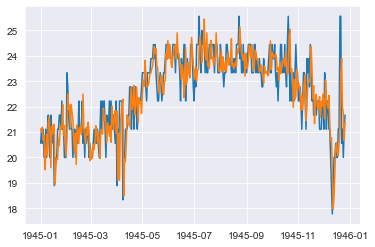

In [141]:
y_test_pred = res.predict(X_test)
print(r2_score(y_test, y_test_pred))

plt.plot(X_test.index,y_test)
plt.plot(X_test.index,y_test_pred)